# 寄信用 應用程式密碼

# http://yhhuang1966.blogspot.com/2018/10/python-gmail.html


![GoogleLogin.PNG](images/GoogleLogin.PNG)

![GoogleLogin2.PNG](images/GoogleLogin2.PNG)

![GoogleLogin3.PNG](images/GoogleLogin3.PNG)

![GoogleLogin4.PNG](images/GoogleLogin4.PNG)

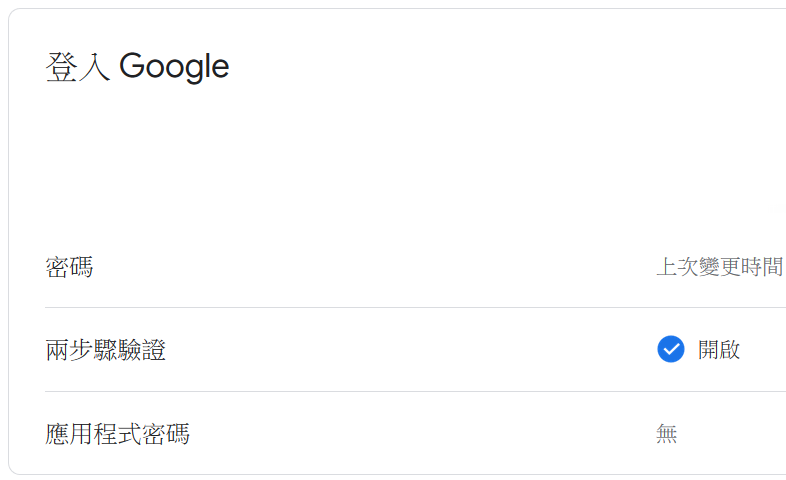
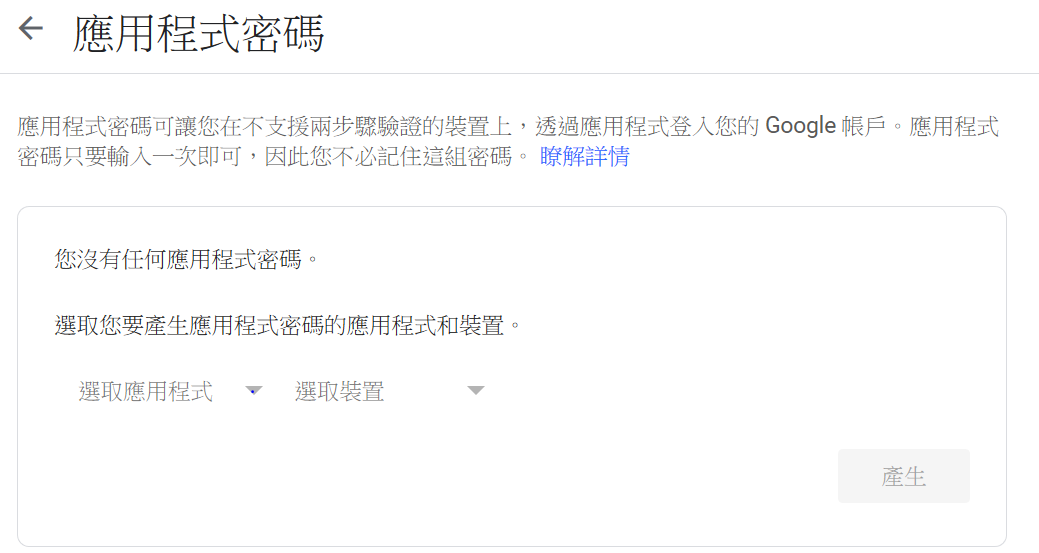
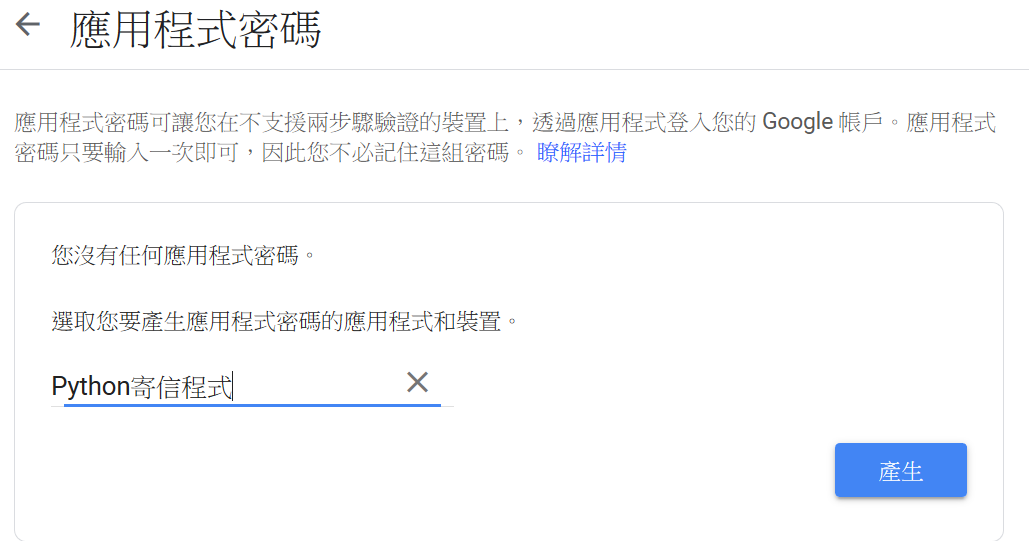
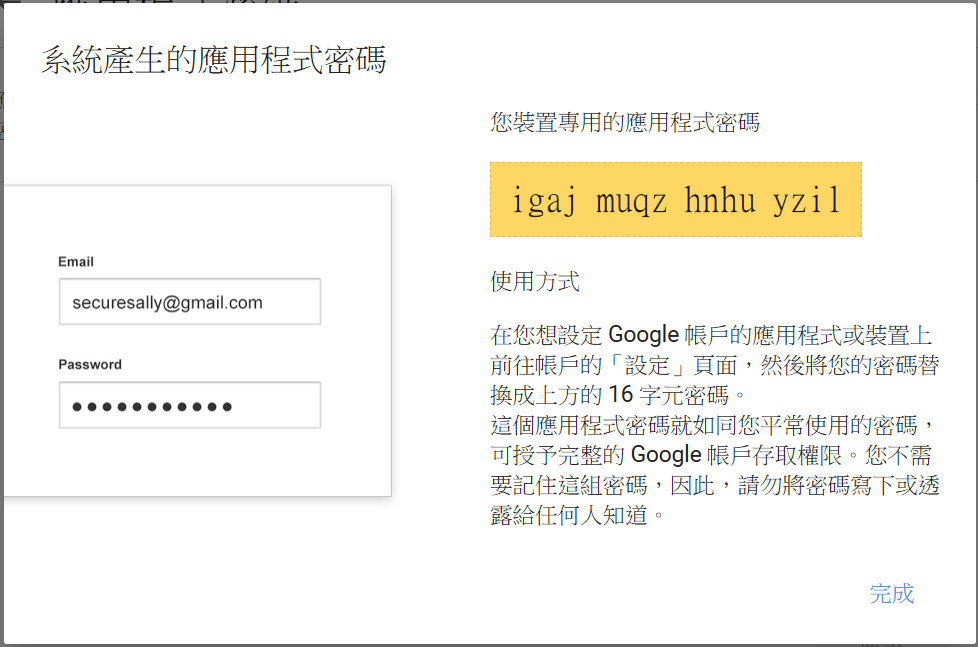

# 跟郵件伺服器打招呼

In [11]:
import smtplib  
smtp=smtplib.SMTP("smtp.gmail.com", 587)     #TSL

smtp.ehlo()

(250,
 b'smtp.gmail.com at your service, [2001:b400:e709:56c1:391c:ed31:4dca:ab2c]\nSIZE 35882577\n8BITMIME\nSTARTTLS\nENHANCEDSTATUSCODES\nPIPELINING\nCHUNKING\nSMTPUTF8')

# 嘗試登入

In [9]:
smtp.starttls() 
smtp.login("jiangsir@tea.nknush.kh.edu.tw", "ashsashs")  

SMTPServerDisconnected: please run connect() first

# oops! 出錯了!

必須進入 Google 帳號管理為應用程式產生特別的密碼才行

但要注意! 帳戶要先設定兩階段驗證後才會出現 應用程式密碼。

在彈出頁面中顯示了一組應用程式專用密碼, 須立即複製到記事本中儲存, 因為只要關閉此頁面便無法查出此密碼, 只能刪除再重新產生 :

igajmuqzhnhuyzil


# 用 SSL 連線

In [12]:
import smtplib 
smtpssl=smtplib.SMTP_SSL("smtp.gmail.com", 465) 
smtpssl.ehlo()

(250,
 b'smtp.gmail.com at your service, [2001:b400:e709:56c1:391c:ed31:4dca:ab2c]\nSIZE 35882577\n8BITMIME\nAUTH LOGIN PLAIN XOAUTH2 PLAIN-CLIENTTOKEN OAUTHBEARER XOAUTH\nENHANCEDSTATUSCODES\nPIPELINING\nCHUNKING\nSMTPUTF8')

In [13]:
smtpssl.login("jiangsir@tea.nknush.kh.edu.tw", "igajmuqzhnhuyzil")

(235, b'2.7.0 Accepted')

In [19]:
import smtplib 
smtpssl=smtplib.SMTP_SSL("smtp.gmail.com", 465) 
smtpssl.ehlo()
smtpssl.login("jiangsir@tea.nknush.kh.edu.tw", "igajmuqzhnhuyzil")

from_addr = 'jiangsir@tea.nknush.kh.edu.tw'
to_addr = 'jiangzero@gmail.com'
msg = 'Subject:Python Test mail!!!\n'

msg += 'test mail content'

smtpssl.sendmail(from_addr, to_addr, msg, mail_options=(), rcpt_options=())

smtpssl.quit() 

(221, b'2.0.0 closing connection j22sm72178055pfn.129 - gsmtp')

# 寄送中文信件

解決此問題的辦法是使用多用途郵件擴展協定 MIME (Multiplepurpose Internet Mail Extensions), 

In [21]:
import smtplib 
from email.mime.text import MIMEText  

smtpssl=smtplib.SMTP_SSL("smtp.gmail.com", 465) 
smtpssl.ehlo()
smtpssl.login("jiangsir@tea.nknush.kh.edu.tw", "igajmuqzhnhuyzil")


msg = 'test mail 中文內容測試'

mime=MIMEText(msg, "plain", "utf-8")  

mime["Subject"]="Python中文信件!!!(MIME)"
mime["From"]="我是誰?"
mime["To"]="jiangzero@gmail.com"

from_addr = 'jiangsir@tea.nknush.kh.edu.tw'
to_addr = 'jiangzero@gmail.com'
smtpssl.sendmail(from_addr, to_addr, mime.as_string())

smtpssl.quit() 

(221, b'2.0.0 closing connection s21sm38823568pfm.3 - gsmtp')

# 傳送 HTML 信件

In [3]:
import smtplib
from email.mime.text import MIMEText

html="""
<!doctype html>
<html>
<head>
  <meta charset='utf-8'>
  <title>HTML mail</title>
</head>
<body>
  <b>HTML 郵件測試</b>
</body>
</html>
"""
mime=MIMEText(html, "html", "utf-8")
mime["Subject"]="寄送HTML 郵件(MIME)"
mime["From"]="我是誰?"
mime["To"]="你是誰?"
msg=mime.as_string()

smtpssl=smtplib.SMTP_SSL("smtp.gmail.com", 465) 
smtpssl.ehlo()
smtpssl.login("jiangsir@tea.nknush.kh.edu.tw", "igajmuqzhnhuyzil")

from_addr="jiangsir@tea.nknush.kh.edu.tw"
to_addr=["jiangzero@gmail.com"]
status=smtpssl.sendmail(from_addr, to_addr, msg)
if status=={}:
    print("郵件傳送成功!")
else:
    print("郵件傳送失敗!")
smtpssl.quit()

郵件傳送成功!


(221, b'2.0.0 closing connection t24sm4190990pfe.110 - gsmtp')